## Assignment: Report on clustering methods

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

Conclusions:
I ran K-Mean, Mean-Shift, Spectral Clustering and Affinity Propagation algorithms for 2,3,5,10 blob datasets at 3 different separation ranges each. For each combination, the algorithm was timed and the labels assigned by the algorithm compared to the y value in the original blob. The output shows how well the algorithm formed clusters based on the features input. The color of the dots in the scatter plot represents the predicted group for the algorithm. When the colors are grouped together, the algorithm is fairly good at forming clusters.

Notes per algorithm:
1. K-Mean: The fastest of the algorithms(3 blobs 95ms).
2. Mean-Shift: Time (3blobs: 500ms) Blob distance: Only assigns one blob when close
3. Spectral:
4. Affinity Propagation: Slow when # clusters is small, faster when there are more clusters. Really overpredicts clusters but to a lesser degree when there are more



In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle


### 3 Blobs (set 1 or 4 -example from lecture)

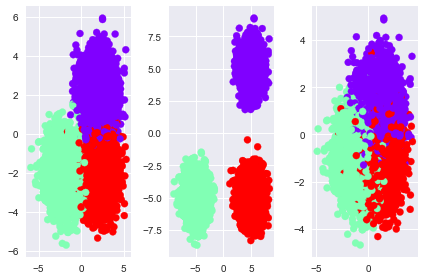

In [18]:
# generate a practice dataset
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]
centers_farther = [[5, 5], [-5, -5], [5, -5]]
centers_closer = [[1, 1], [-1, -1], [1, -1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers_farther,
    cluster_std=1,
    n_features=2,
    random_state=42)

X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers_closer,
    cluster_std=1,
    n_features=2,
    random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X2[:, 0], X2[:, 1], c=y2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X3[:, 0], X3[:, 1], c=y3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

### K-Means - 3 blobs

In [55]:
#%%timeit -o
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
y_pred2 = KMeans(n_clusters=3, random_state=42).fit_predict(X_train2)
y_pred3 = KMeans(n_clusters=3, random_state=42).fit_predict(X_train3)


# fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)
# # Plot the solution.
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmean)
# plt.show()


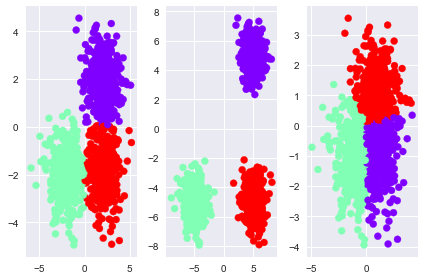

Percent Assigned to 1 of 3 Original Blobs:
0.969
Percent Assigned to 1 of 3 Original Blobs:(farther):
1.0
Percent Assigned to 1 of 3 Original Blobs(closer):
0.774


In [56]:


fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_pred2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_pred3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()



print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(y_train,y_pred)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,y_pred2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,y_pred3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

### Mean Shift - 3 blobs
Conditions for use: small to medium dataset, unsure about the number of clusters or expect a lot of clusters, clusters do not have to be the same size or shape and some points can be excluded from all clusters

In [64]:
#%%timeit 

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
bandwidth2 = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)
bandwidth3 = estimate_bandwidth(X_train3, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms3 = MeanShift(bandwidth=bandwidth3, bin_seeding=True)

ms.fit(X_train)
ms2.fit(X_train2)
ms3.fit(X_train3)

# Extract cluster assignments for each data point.
labels = ms.labels_
labels2 = ms2.labels_
labels3 = ms3.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
cluster_centers2 = ms2.cluster_centers_
cluster_centers3 = ms3.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
n_clusters2_ = len(np.unique(labels2))
n_clusters3_ = len(np.unique(labels3))

# print("Number of estimated clusters: {}".format(n_clusters_))
# print("Number of estimated clusters (farther): {}".format(n_clusters2_))
# print("Number of estimated clusters (closer): {}".format(n_clusters3_))

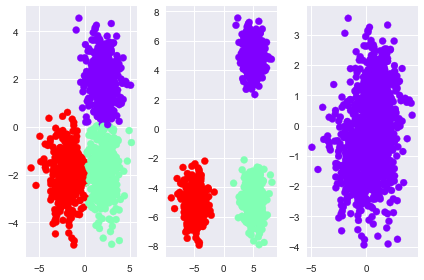

Percent Assigned to 1 of 3 Original Blobs:
0.967
Percent Assigned to 1 of 3 Original Blobs:(farther):
1.0
Percent Assigned to 1 of 3 Original Blobs(closer):
1.0


In [65]:

fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=labels3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()


print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(y_train,labels)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,labels2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,labels3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)



### Spectral Clustering
Conditions for use: also slow works best when k is not large and clusters are equal size. performs dimension reduction based on some measure of similarity (ie. nearest-neighbor)

In [71]:
#%%timeit -o
n_clusters = 3
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc2 = SpectralClustering(n_clusters=n_clusters)
sc3 = SpectralClustering(n_clusters=n_clusters)

sc.fit(X_train)
sc2.fit(X_train2)
sc3.fit(X_train3)

#Predicted clusters.
predict=sc.fit_predict(X_train)
predict2=sc2.fit_predict(X_train2)
predict3=sc3.fit_predict(X_train3)

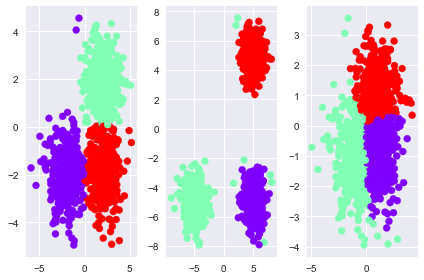

Percent Assigned to 1 of 3 Original Blobs:
0.994
Percent Assigned to 1 of 3 Original Blobs:(farther):
0.993
Percent Assigned to 1 of 3 Original Blobs(closer):
0.766


In [72]:



fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()


print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(predict,labels)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,predict2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,predict3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(3)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

### Affinity Propagation
Conditions for use: when many clusters expected, tends to pick more clusters, often used for image. slow, memory intensive better for small to medium datasets

In [76]:
%%timeit -o
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
#af = AffinityPropagation().fit(X_train)
#af2 = AffinityPropagation().fit(X_train2)
af3 = AffinityPropagation().fit(X_train3)
# print('Done')

# Pull the number of clusters and cluster assignments for each data point.
#cluster_centers_indices = af.cluster_centers_indices_
#cluster_centers_indices2 = af2.cluster_centers_indices_
cluster_centers_indices3 = af3.cluster_centers_indices_
#n_clusters_ = len(cluster_centers_indices)
#n_clusters2_ = len(cluster_centers_indices2)
n_clusters3_ = len(cluster_centers_indices3)

#labels = af.labels_
#labels2 = af2.labels_
labels3 = af3.labels_

#print('Estimated number of clusters: {}'.format(n_clusters_))
#print('Estimated number of clusters (farther): {}'.format(n_clusters2_))
print('Estimated number of clusters (closer): {}'.format(n_clusters3_))

Estimated number of clusters (closer): 36
Estimated number of clusters (closer): 36
Estimated number of clusters (closer): 36
Estimated number of clusters (closer): 36
1 loop, best of 3: 5.42 s per loop


<TimeitResult : 1 loop, best of 3: 5.42 s per loop>

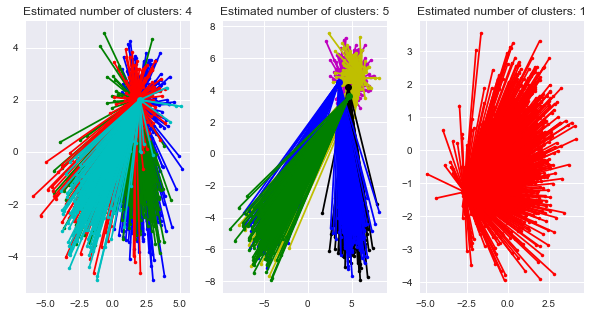

In [198]:


#plt.figure(1)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))


# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.subplot(131)
#plt.clf()

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))

plt.subplot(132)
for k, col in zip(range(n_clusters2_), colors):
    class_members = labels2 == k
    cluster_center = X_train2[cluster_centers_indices2[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters2_))

plt.subplot(133)
for k, col in zip(range(n_clusters3_), colors):
    class_members = labels3 == k
    cluster_center = X_train3[cluster_centers_indices3[k]]
    plt.plot(X_train3[class_members, 0], X_train3[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train3[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters3_))

plt.show()

## 2 Blobs (set 2 or 4)

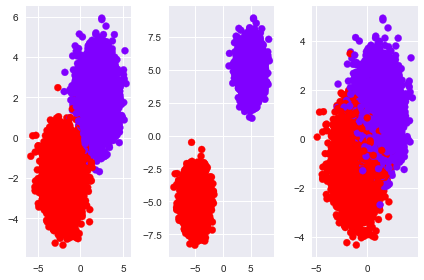

In [118]:
# generate a practice dataset
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2]]
centers_farther = [[5, 5], [-5, -5]]
centers_closer = [[1, 1], [-1, -1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers_farther,
    cluster_std=1,
    n_features=2,
    random_state=42)

X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers_closer,
    cluster_std=1,
    n_features=2,
    random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X2[:, 0], X2[:, 1], c=y2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X3[:, 0], X3[:, 1], c=y3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

### K-Means - 2 blobs

In [119]:
#%%timeit -o
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)
y_pred2 = KMeans(n_clusters=2, random_state=42).fit_predict(X_train2)
y_pred3 = KMeans(n_clusters=2, random_state=42).fit_predict(X_train3)

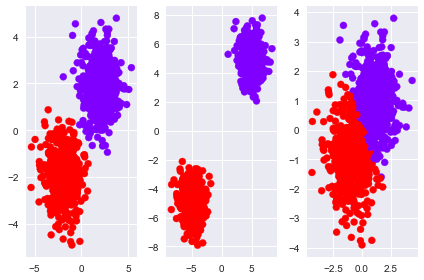

Percent Assigned to 1 of 3 Original Blobs:
0.997
Percent Assigned to 1 of 3 Original Blobs:(farther):
col_0    0    1
row_0          
0      512    0
1        0  488
1.0
Percent Assigned to 1 of 3 Original Blobs(closer):
0.92


In [120]:


fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_pred2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_pred3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()

print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(y_train,y_pred)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,y_pred2)
print(c1)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,y_pred3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)


### Mean Shift - 2 blobs
Conditions for use: small to medium dataset, unsure about the number of clusters or expect a lot of clusters, clusters do not have to be the same size or shape and some points can be excluded from all clusters

In [123]:
#%%timeit -o
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
bandwidth2 = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)
bandwidth3 = estimate_bandwidth(X_train3, quantile=0.2, n_samples=500)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms3 = MeanShift(bandwidth=bandwidth3, bin_seeding=True)

ms.fit(X_train)
ms2.fit(X_train2)
ms3.fit(X_train3)

# Extract cluster assignments for each data point.
labels = ms.labels_
labels2 = ms2.labels_
labels3 = ms3.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
cluster_centers2 = ms2.cluster_centers_
cluster_centers3 = ms3.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
n_clusters2_ = len(np.unique(labels2))
n_clusters3_ = len(np.unique(labels3))

# print("Number of estimated clusters: {}".format(n_clusters_))
# print("Number of estimated clusters (farther): {}".format(n_clusters2_))
# print("Number of estimated clusters (closer): {}".format(n_clusters3_))

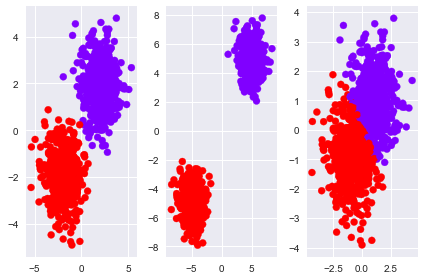

Percent Assigned to 1 of 3 Original Blobs:
0.998
Percent Assigned to 1 of 3 Original Blobs:(farther):
1.0
Percent Assigned to 1 of 3 Original Blobs(closer):
0.918


In [124]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=labels3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()


print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(y_train,labels)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,labels2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,labels3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)




### Spectral Clustering - 2 blobs
Conditions for use: also slow works best when k is not large and clusters are equal size. performs dimension reduction based on some measure of similarity (ie. nearest-neighbor)

In [125]:
#%%timeit -o
n_clusters = 2
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc2 = SpectralClustering(n_clusters=n_clusters)
sc3 = SpectralClustering(n_clusters=n_clusters)

sc.fit(X_train)
sc2.fit(X_train2)
sc3.fit(X_train3)

#Predicted clusters.
predict=sc.fit_predict(X_train)
predict2=sc2.fit_predict(X_train2)
predict3=sc3.fit_predict(X_train3)

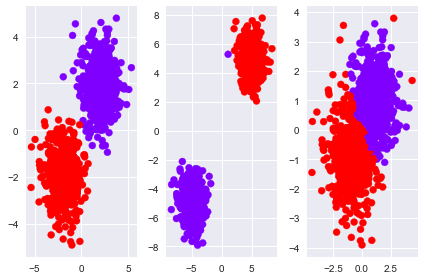

Percent Assigned to 1 of 3 Original Blobs:
1.0
Percent Assigned to 1 of 3 Original Blobs:(farther):
0.999
Percent Assigned to 1 of 3 Original Blobs(closer):
0.912


In [126]:



fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()


print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(predict,labels)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,predict2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,predict3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(2)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

### Affinity Propagation - 2 blobs
Conditions for use: when many clusters expected, tends to pick more clusters, often used for image. slow, memory intensive better for small to medium datasets

In [102]:
%%timeit -o
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
#af = AffinityPropagation().fit(X_train)
#af2 = AffinityPropagation().fit(X_train2)
af3 = AffinityPropagation().fit(X_train3)
# print('Done')

# Pull the number of clusters and cluster assignments for each data point.
#cluster_centers_indices = af.cluster_centers_indices_
#cluster_centers_indices2 = af2.cluster_centers_indices_
cluster_centers_indices3 = af3.cluster_centers_indices_
#n_clusters_ = len(cluster_centers_indices)
#n_clusters2_ = len(cluster_centers_indices2)
n_clusters3_ = len(cluster_centers_indices3)

#labels = af.labels_
#labels2 = af2.labels_
labels3 = af3.labels_

#print('Estimated number of clusters: {}'.format(n_clusters_))
#print('Estimated number of clusters (farther): {}'.format(n_clusters2_))
print('Estimated number of clusters (closer): {}'.format(n_clusters3_))


Estimated number of clusters (closer): 36
Estimated number of clusters (closer): 36
Estimated number of clusters (closer): 36
Estimated number of clusters (closer): 36
1 loop, best of 3: 7.92 s per loop


<TimeitResult : 1 loop, best of 3: 7.92 s per loop>

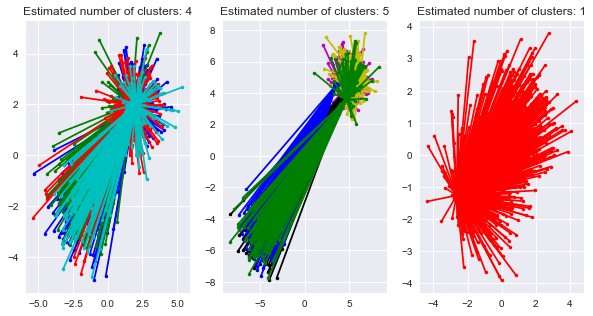

In [207]:

#plt.figure(1)

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))


# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.subplot(131)
#plt.clf()

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))

plt.subplot(132)
for k, col in zip(range(n_clusters2_), colors):
    class_members = labels2 == k
    cluster_center = X_train2[cluster_centers_indices2[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters2_))

plt.subplot(133)
for k, col in zip(range(n_clusters3_), colors):
    class_members = labels3 == k
    cluster_center = X_train3[cluster_centers_indices3[k]]
    plt.plot(X_train3[class_members, 0], X_train3[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train3[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters3_))

plt.show()

## 5 Blobs (set 3 or 4)

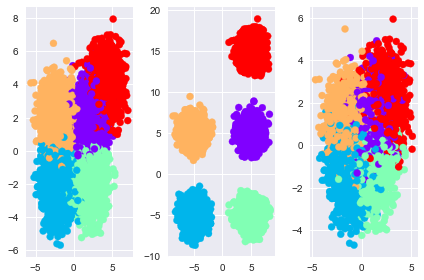

In [176]:
# generate a practice dataset
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [4, 4]]
centers_farther = [[5, 5], [-5, -5], [5, -5], [-5, 5], [5, 15]]
centers_closer = [[1, 1], [-1, -1], [1, -1], [-1, 1], [2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers_farther,
    cluster_std=1,
    n_features=2,
    random_state=42)

X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers_closer,
    cluster_std=1,
    n_features=2,
    random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=cm.rainbow)
plt.tight_layout()
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

### K-Means - 5 blobs

In [128]:
#%%timeit -o
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)
y_pred2 = KMeans(n_clusters=5, random_state=42).fit_predict(X_train2)
y_pred3 = KMeans(n_clusters=5, random_state=42).fit_predict(X_train3)




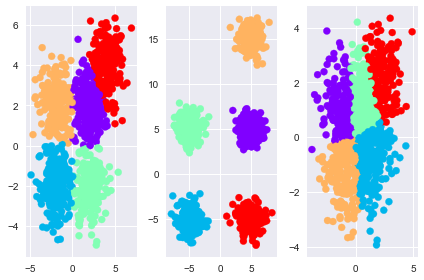

Percent Assigned to 1 of 3 Original Blobs:
0.933
Percent Assigned to 1 of 3 Original Blobs:(farther):
1.0
Percent Assigned to 1 of 3 Original Blobs(closer):
0.649


In [129]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_pred2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_pred3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()

print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(y_train,y_pred)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(5)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,y_pred2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(5)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,y_pred3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(5)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)




### Mean Shift - 5 blobs
Conditions for use: small to medium dataset, unsure about the number of clusters or expect a lot of clusters, clusters do not have to be the same size or shape and some points can be excluded from all clusters

In [135]:

#%%timeit -o
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
bandwidth2 = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)
bandwidth3 = estimate_bandwidth(X_train3, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms3 = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(X_train)
ms2.fit(X_train2)
ms3.fit(X_train3)

# Extract cluster assignments for each data point.
labels = ms.labels_
labels2 = ms2.labels_
labels3 = ms3.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
cluster_centers2 = ms2.cluster_centers_
cluster_centers3 = ms3.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
n_clusters2_ = len(np.unique(labels2))
n_clusters3_ = len(np.unique(labels3))

print("Number of estimated clusters: {}".format(n_clusters_))
print("Number of estimated clusters (farther): {}".format(n_clusters2_))
print("Number of estimated clusters (closer): {}".format(n_clusters3_))



Number of estimated clusters: 4
Number of estimated clusters (farther): 5
Number of estimated clusters (closer): 1


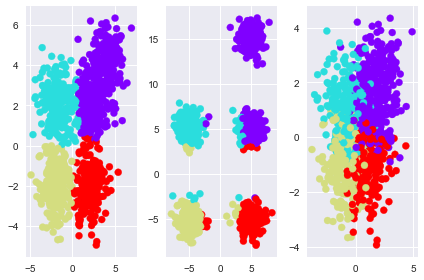

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      192   21    0    8
1        0    5  193    5
2        1    1    7  182
3        2  181    4    0
4      198    0    0    0
Comparing the assigned categories to the ones in the data (farther):
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0  203    0    0    0
2        0    0    0    0  191
3        0    0    0  187    0
4        0    0  198    0    0
Comparing the assigned categories to the ones in the data (closer):
col_0    0
row_0     
0      221
1      203
2      191
3      187
4      198


In [221]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=labels,cmap=cm.rainbow)
plt.tight_layout()
plt.show()




print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))
print('Comparing the assigned categories to the ones in the data (farther):')
print(pd.crosstab(y_train2,labels2))
print('Comparing the assigned categories to the ones in the data (closer):')
print(pd.crosstab(y_train3,labels3))

### Spectral Clustering - 5 blobs
Conditions for use: also slow works best when k is not large and clusters are equal size. performs dimension reduction based on some measure of similarity (ie. nearest-neighbor)

In [177]:
#%%timeit -o
n_clusters = 5
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc2 = SpectralClustering(n_clusters=n_clusters)
sc3 = SpectralClustering(n_clusters=n_clusters)

sc.fit(X_train)
sc2.fit(X_train2)
sc3.fit(X_train3)

#Predicted clusters.
predict=sc.fit_predict(X_train)
predict2=sc2.fit_predict(X_train2)
predict3=sc3.fit_predict(X_train3)




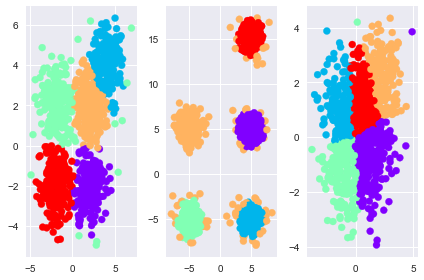

Percent Assigned to 1 of 3 Original Blobs:
0.827
Percent Assigned to 1 of 3 Original Blobs:(farther):
0.929
Percent Assigned to 1 of 3 Original Blobs(closer):
0.648


In [178]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()


print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(predict,labels)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(5)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,predict2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(5)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,predict3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(5)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

### Affinity Propagation -5 blobs
Conditions for use: when many clusters expected, tends to pick more clusters, often used for image. slow, memory intensive better for small to medium datasets

In [147]:
%%timeit -o
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
# af = AffinityPropagation().fit(X_train)
#af2 = AffinityPropagation().fit(X_train2)
af3 = AffinityPropagation().fit(X_train3)
# print('Done')

# Pull the number of clusters and cluster assignments for each data point.
#cluster_centers_indices = af.cluster_centers_indices_
#cluster_centers_indices2 = af2.cluster_centers_indices_
cluster_centers_indices3 = af3.cluster_centers_indices_
#n_clusters_ = len(cluster_centers_indices)
#n_clusters2_ = len(cluster_centers_indices2)
n_clusters3_ = len(cluster_centers_indices3)

#labels = af.labels_
#labels2 = af2.labels_
labels3 = af3.labels_

#print('Estimated number of clusters: {}'.format(n_clusters_))
#print('Estimated number of clusters (farther): {}'.format(n_clusters2_))
print('Estimated number of clusters (closer): {}'.format(n_clusters3_))

#plt.figure(1)



Estimated number of clusters (closer): 37
Estimated number of clusters (closer): 37
Estimated number of clusters (closer): 37
Estimated number of clusters (closer): 37
1 loop, best of 3: 2.98 s per loop


<TimeitResult : 1 loop, best of 3: 2.98 s per loop>

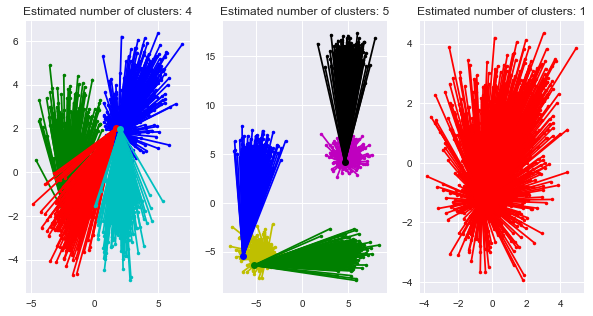

In [225]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))


# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.subplot(131)
#plt.clf()

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))

plt.subplot(132)
for k, col in zip(range(n_clusters2_), colors):
    class_members = labels2 == k
    cluster_center = X_train2[cluster_centers_indices2[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters2_))

plt.subplot(133)
for k, col in zip(range(n_clusters3_), colors):
    class_members = labels3 == k
    cluster_center = X_train3[cluster_centers_indices3[k]]
    plt.plot(X_train3[class_members, 0], X_train3[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train3[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters3_))

plt.show()

## 10 Blobs (set 4 or 4)

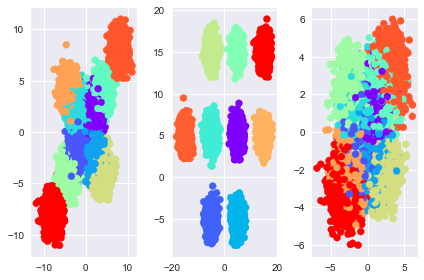

In [179]:
# generate a practice dataset
# The coordinates of the centers of our blobs.
centers =  [[2, 2], [-2, -2], [2, -2], [-2, 2], [4, 4], [-4, -4], [4, -4], [-4, 4], [8, 8], [-8, -8]]
centers_farther = [[5, 5], [-5, -5], [5, -5], [-5, 5], [5, 15], [-5, 15], [15, 5], [-15, 5], [15, 15]]
centers_closer  = [[1, 1], [-1, -1], [1, -1], [-1, 1], [2, 2], [-2, 2], [2, -2], [-2, -2], [3, 3], [-3, -3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers_farther,
    cluster_std=1,
    n_features=2,
    random_state=42)

X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers_closer,
    cluster_std=1,
    n_features=2,
    random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=cm.rainbow)
plt.tight_layout()
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

### K-Means- 10 blobs

In [173]:
#%%timeit -o
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)
y_pred2 = KMeans(n_clusters=3, random_state=42).fit_predict(X_train2)
y_pred3 = KMeans(n_clusters=3, random_state=42).fit_predict(X_train3)




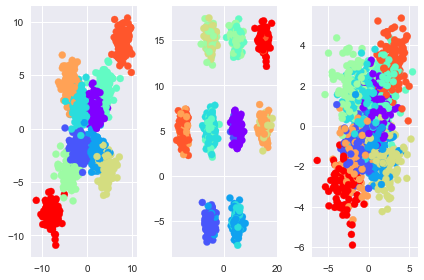

Percent Assigned to 1 of 3 Original Blobs:
0.962
Percent Assigned to 1 of 3 Original Blobs:(farther):
1.0
Percent Assigned to 1 of 3 Original Blobs(closer):
0.83


In [174]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_train,cmap=cm.rainbow)
plt.tight_layout()
plt.show()



print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(y_train,y_pred)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,y_pred2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,y_pred3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)


### Mean Shift - 10 blobs
Conditions for use: small to medium dataset, unsure about the number of clusters or expect a lot of clusters, clusters do not have to be the same size or shape and some points can be excluded from all clusters

In [170]:
#%%timeit -o
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
bandwidth2 = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)
bandwidth3 = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms3 = MeanShift(bandwidth=bandwidth3, bin_seeding=True)

ms.fit(X_train)
ms2.fit(X_train2)
ms3.fit(X_train3)

# Extract cluster assignments for each data point.
labels = ms.labels_
labels2 = ms2.labels_
labels3 = ms3.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
cluster_centers2 = ms2.cluster_centers_
cluster_centers3 = ms3.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
n_clusters2_ = len(np.unique(labels2))
n_clusters3_ = len(np.unique(labels3))

print("Number of estimated clusters: {}".format(n_clusters_))
print("Number of estimated clusters (farther): {}".format(n_clusters2_))
print("Number of estimated clusters (closer): {}".format(n_clusters3_))


Number of estimated clusters: 2
Number of estimated clusters (farther): 4
Number of estimated clusters (closer): 1


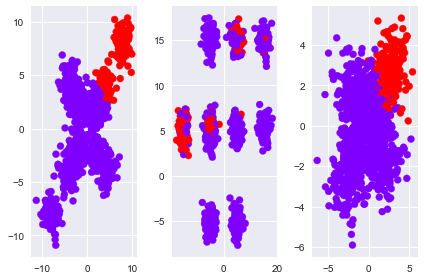

Percent Assigned to 1 of 3 Original Blobs:
0.982
Percent Assigned to 1 of 3 Original Blobs:(farther):
0.892
Percent Assigned to 1 of 3 Original Blobs(closer):
1.0


In [171]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=labels,cmap=cm.rainbow)
plt.tight_layout()
plt.show()


print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(y_train,labels)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,labels2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,labels3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

### Spectral Clustering - 10 blobs
Conditions for use: also slow works best when k is not large and clusters are equal size. performs dimension reduction based on some measure of similarity (ie. nearest-neighbor)

In [164]:
#%%timeit -o
n_clusters = 10
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc2 = SpectralClustering(n_clusters=n_clusters)
sc3 = SpectralClustering(n_clusters=n_clusters)

sc.fit(X_train)
sc2.fit(X_train2)
sc3.fit(X_train3)

#Predicted clusters.
predict=sc.fit_predict(X_train)
predict2=sc2.fit_predict(X_train2)
predict3=sc3.fit_predict(X_train3)




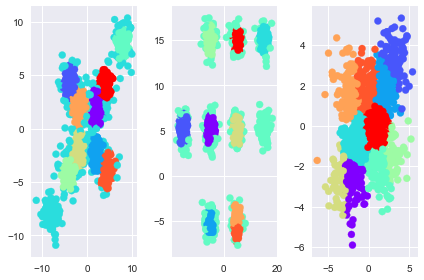

Percent Assigned to 1 of 3 Original Blobs:
0.84
Percent Assigned to 1 of 3 Original Blobs:(farther):
0.821
Percent Assigned to 1 of 3 Original Blobs(closer):
0.529


In [165]:
fig, axes = plt.subplots(nrows=1, ncols=3,sharey=True)

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict,cmap=cm.rainbow)

plt.subplot(132)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2,cmap=cm.rainbow)


plt.subplot(133)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict3,cmap=cm.rainbow)
plt.tight_layout()
plt.show()


print('Percent Assigned to 1 of 3 Original Blobs:')
c1 = pd.crosstab(predict,labels)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs:(farther):')

c1 = pd.crosstab(y_train2,predict2)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

print('Percent Assigned to 1 of 3 Original Blobs(closer):')

c1 = pd.crosstab(y_train3,predict3)
c1 = c1.stack()
c_series = c1.sort_values(ascending=False)
c_series_max =c_series.head(10)
percent_blobbed = (c_series_max.sum()) / (c_series.sum())
print(percent_blobbed)

### Affinity Propagation
Conditions for use: when many clusters expected, tends to pick more clusters, often used for image. slow, memory intensive better for small to medium datasets

In [183]:
%%timeit -o
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
#af = AffinityPropagation().fit(X_train)
af2 = AffinityPropagation().fit(X_train2)
#af3 = AffinityPropagation().fit(X_train3)
# print('Done')

# Pull the number of clusters and cluster assignments for each data point.
#cluster_centers_indices = af.cluster_centers_indices_
cluster_centers_indices2 = af2.cluster_centers_indices_
#cluster_centers_indices3 = af3.cluster_centers_indices_
#n_clusters_ = len(cluster_centers_indices)
n_clusters2_ = len(cluster_centers_indices2)
#n_clusters3_ = len(cluster_centers_indices3)

#labels = af.labels_
labels2 = af2.labels_
#labels3 = af3.labels_

#print('Estimated number of clusters: {}'.format(n_clusters_))
print('Estimated number of clusters (farther): {}'.format(n_clusters2_))
#print('Estimated number of clusters (closer): {}'.format(n_clusters3_))

#plt.figure(1)



Estimated number of clusters (farther): 9
Estimated number of clusters (farther): 9
Estimated number of clusters (farther): 9
Estimated number of clusters (farther): 9
1 loop, best of 3: 2.51 s per loop


<TimeitResult : 1 loop, best of 3: 2.51 s per loop>

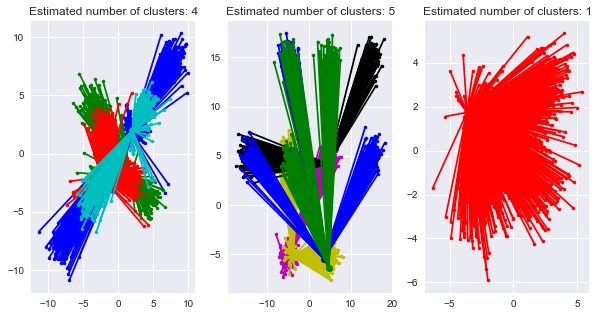

In [234]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))


# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.subplot(131)
#plt.clf()

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters_))

plt.subplot(132)
for k, col in zip(range(n_clusters2_), colors):
    class_members = labels2 == k
    cluster_center = X_train2[cluster_centers_indices2[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters2_))

plt.subplot(133)
for k, col in zip(range(n_clusters3_), colors):
    class_members = labels3 == k
    cluster_center = X_train3[cluster_centers_indices3[k]]
    plt.plot(X_train3[class_members, 0], X_train3[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train3[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: {}'.format(n_clusters3_))

plt.show()